# Day 17 Assignment

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%matplotlib inline

## Question 1:
### ● Using the given MT cars dataset you need to find outlier with z score.

In [4]:
df_cars=pd.read_csv('datasets/mtcars.csv')
df_cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df_cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [6]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
'''
droping model which is categorical colum,
am and vs which are also classification feature 0 or 1
'''
car_cols=df_cars.columns.drop(['model','am','vs','cyl'])
car_cols

Index(['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec', 'gear', 'carb'], dtype='object')

In [8]:
def display_boxplot(df_cars):
    for col in car_cols:
        print("Boxplot of",col)
        plt.figure(figsize=(12,6))
        sns.boxplot(x=col,data=df_cars)
        plt.show()
    plt.close()  

Boxplot of mpg


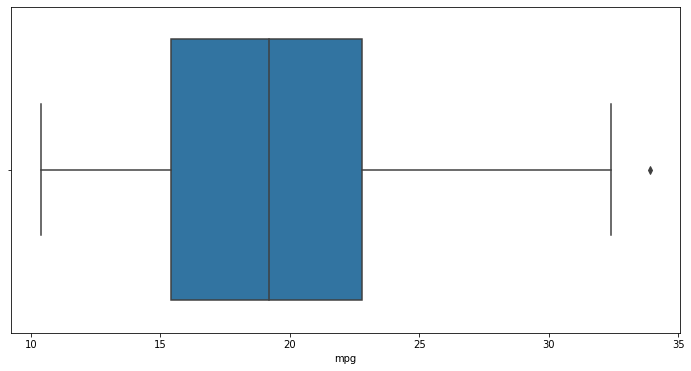

Boxplot of disp


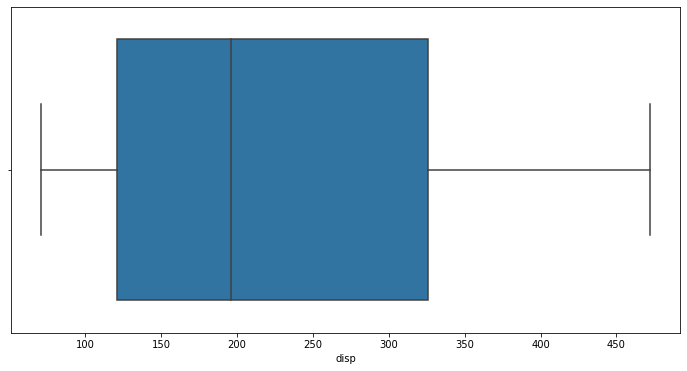

Boxplot of hp


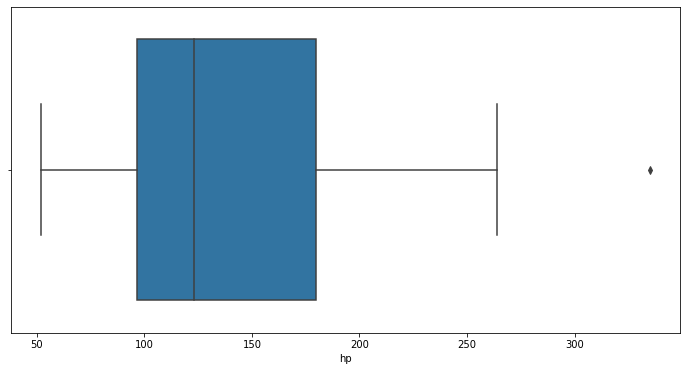

Boxplot of drat


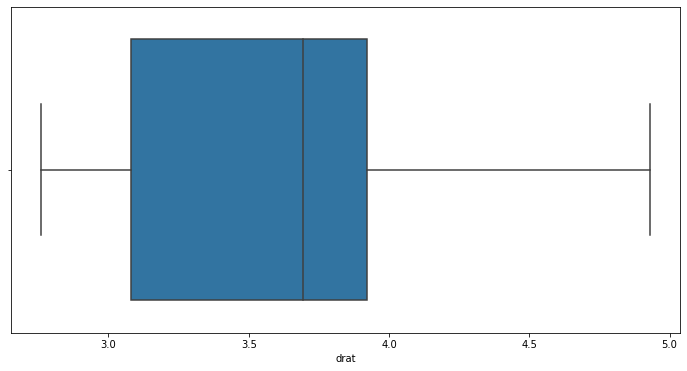

Boxplot of wt


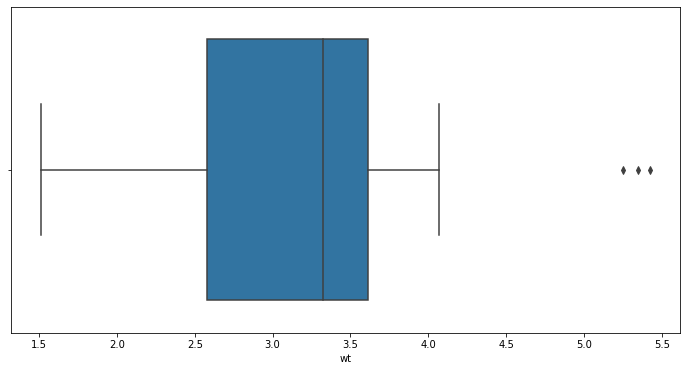

Boxplot of qsec


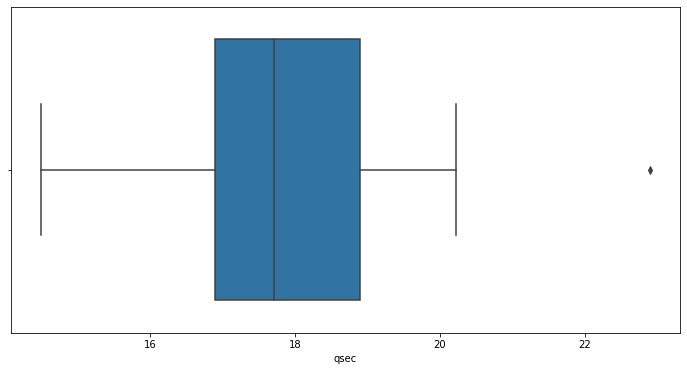

Boxplot of gear


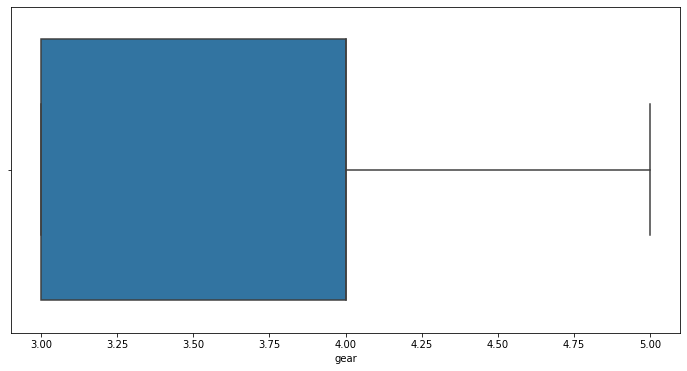

Boxplot of carb


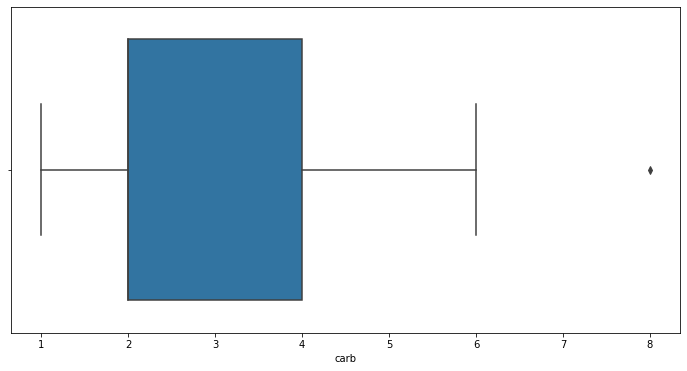

In [9]:
display_boxplot(df_cars)

In [10]:
df_cars.shape

(32, 12)

### Using Z-score method:

In [13]:
'''
droping categorical column from df_cars
'''
df_cars.drop('model',axis=1,inplace=True)

In [14]:
z = np.abs(stats.zscore(df_cars))
print(z)

[[0.07755635 0.04503773 0.50186333 0.46841743 0.51511351 0.55707001
  0.83875679 0.9258201  1.16774842 0.42640143 1.08965012]
 [0.07755635 0.04503773 0.50186333 0.46841743 0.51511351 0.19702183
  0.46391643 0.9258201  1.16774842 0.42640143 1.08965012]
 [0.4299483  1.21601884 1.00890206 0.76891162 0.42145651 0.98065609
  0.60036244 1.08012345 1.16774842 0.42640143 1.20745013]
 [0.15586567 0.04503773 0.45370965 0.46841743 1.02086131 0.28304239
  1.1559294  1.08012345 0.85634884 0.95940322 1.20745013]
 [0.37272226 1.12594337 1.44828562 0.68053098 0.88974151 0.60073196
  0.46391643 0.9258201  0.85634884 0.95940322 0.44175005]
 [0.49018625 0.04503773 0.13193508 0.55679807 1.62026612 0.62897103
  1.67802847 1.08012345 0.85634884 0.95940322 1.20745013]
 [1.23412482 1.12594337 1.44828562 1.91786003 0.77735311 0.78428593
  1.25375861 0.9258201  0.85634884 0.95940322 1.08965012]
 [0.7431856  1.21601884 0.63154824 1.31687163 0.1217541  0.24774355
  1.53076976 1.08012345 0.85634884 0.42640143 0.44

In [19]:
threshold = 2
outliers=np.where(z > 2)
outliers

(array([13, 14, 22, 23, 23, 24]), array([ 0,  4,  5,  3,  6, 10]))

In [16]:
#removing outliers using z score
df_cars = df_cars[(z < 2).all(axis=1)]

In [17]:
df_cars.shape

(21, 11)

In [38]:
df_cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Question 2:
### ● Using the Boston data set from sklearn, find out the Outlier and treat them.

In [20]:
from sklearn.datasets import load_boston

In [21]:
l=load_boston()

In [22]:
l.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [23]:
l['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [24]:
l['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [25]:
df_boston = pd.DataFrame(np.c_[l['data'], l['target']], columns = np.append(l['feature_names'], ['target']))
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
df_boston.shape

(506, 14)

In [30]:
len(df_boston[df_boston['CHAS']==0]) #Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

471

In [31]:
#droping CHAS columns bcz CHAS column is classify by 0 and 1,
cols=df_boston.columns.drop(['CHAS'])
cols

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [32]:
def display_boxplot(df_boston):
    '''
    argument : boston data frame
    
    it will display boxplot of each column 
    
    '''
    for col in cols:
        print("Boxplot of",col)
        plt.figure(figsize=(12,6))
        sns.boxplot(x=col,data=df_boston)
        plt.show()
    plt.close()    
    

Boxplot of CRIM


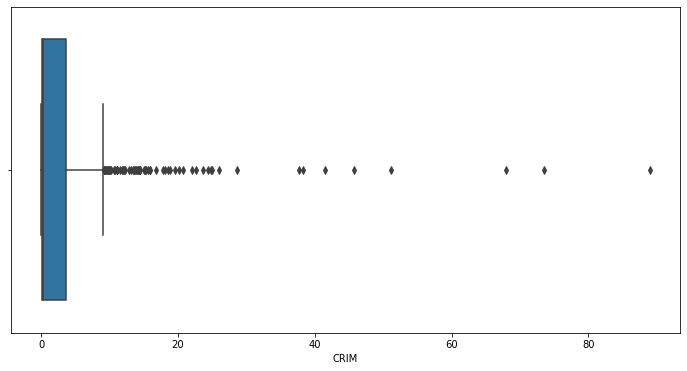

Boxplot of ZN


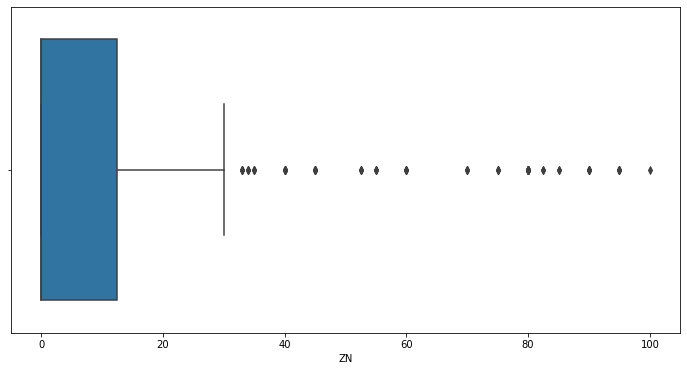

Boxplot of INDUS


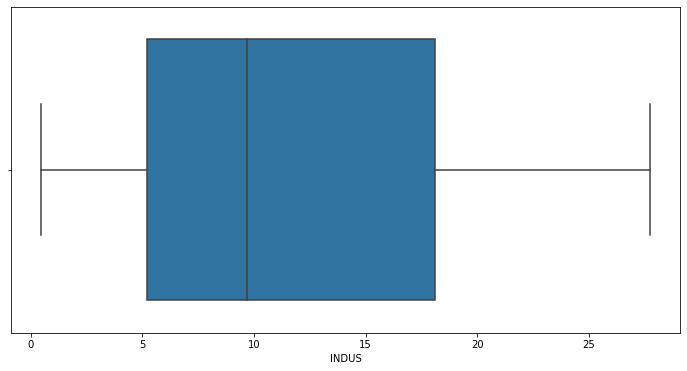

Boxplot of NOX


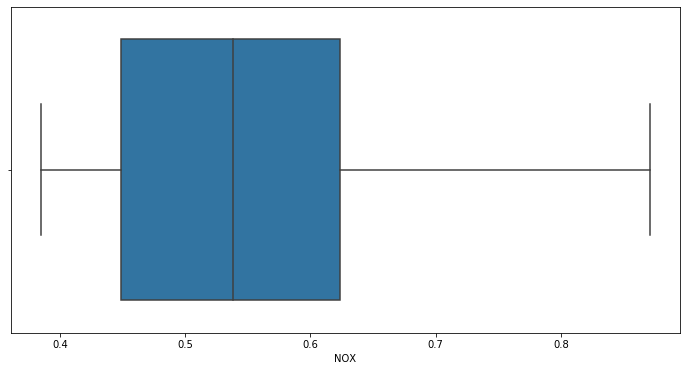

Boxplot of RM


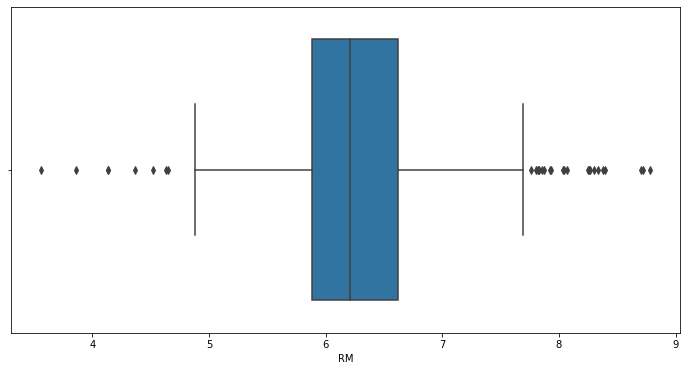

Boxplot of AGE


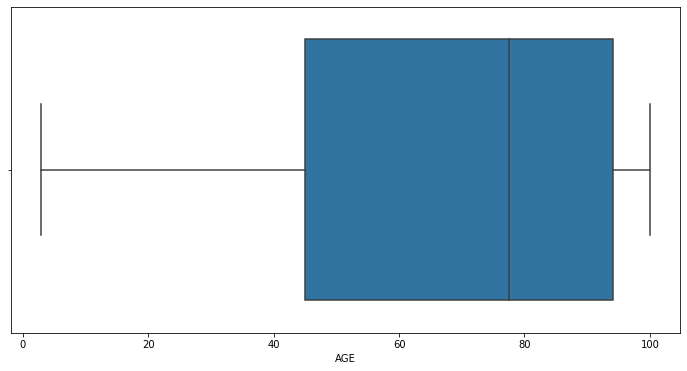

Boxplot of DIS


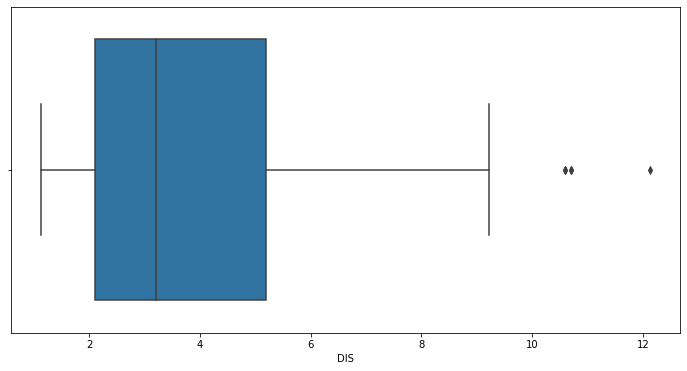

Boxplot of RAD


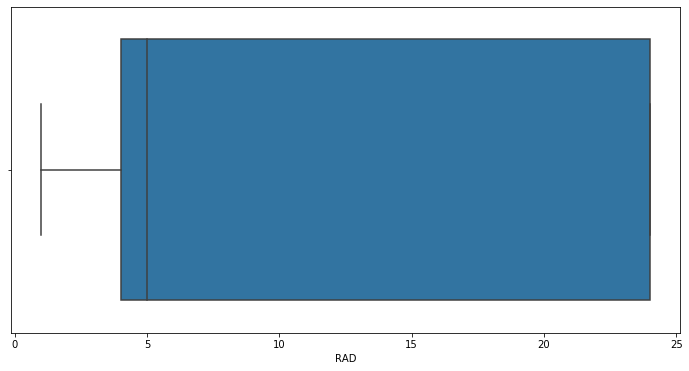

Boxplot of TAX


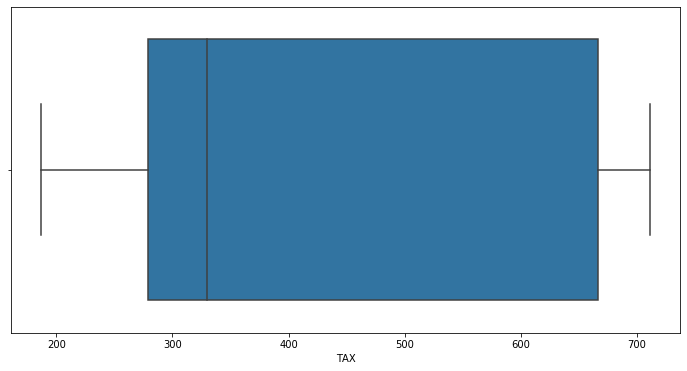

Boxplot of PTRATIO


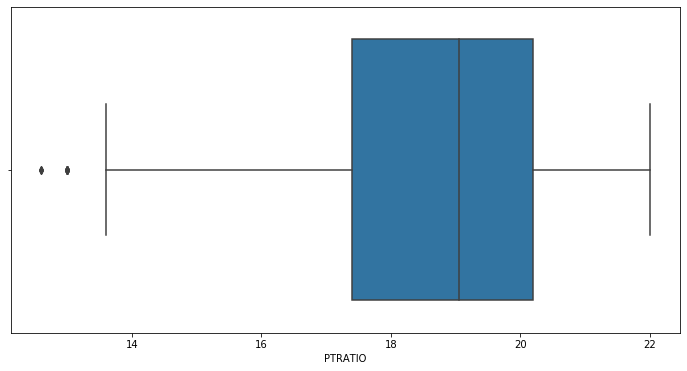

Boxplot of B


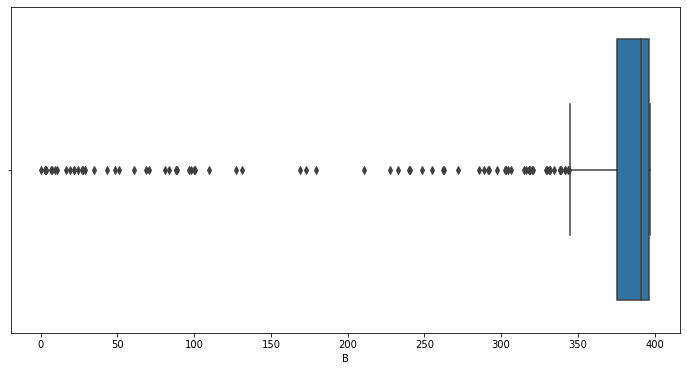

Boxplot of LSTAT


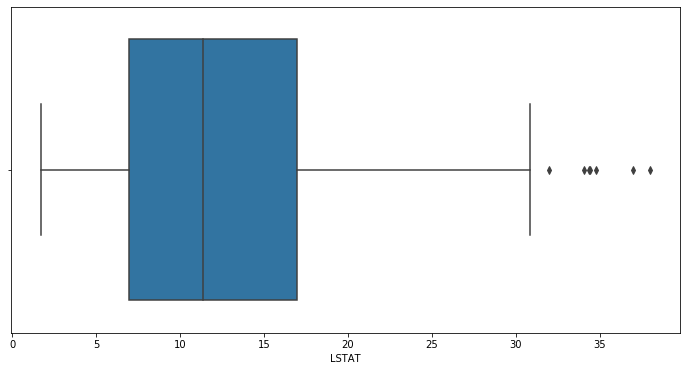

Boxplot of target


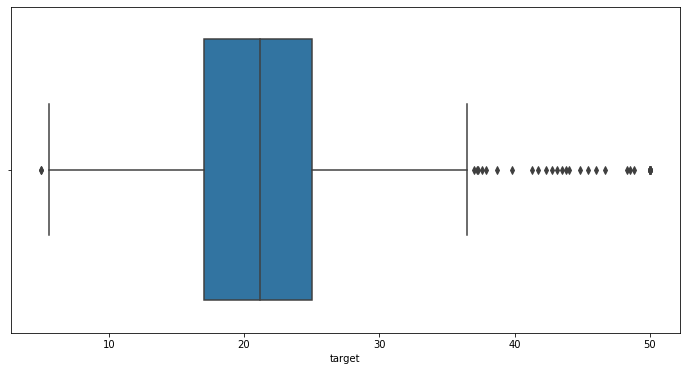

In [33]:
display_boxplot(df_boston)

### Using IQR method:

In [34]:
def remove_outlier(df_boston):
    '''
    argument : boston data frame
    
    return :   it return boston dataframe after removing the outliers 
    
    '''
    print("Below are the Lower whisher value and Upper Whisher value for each column")
    for col in cols:
        Q1=df_boston[col].quantile(0.25)
        Q3=df_boston[col].quantile(0.75)
        IQR=Q3-Q1
        Lower_whishker= Q1 - 1.5*(IQR)
        Upper_whishker= Q3 + 1.5*(IQR)
        print(col,'is',Lower_whishker,"to",Upper_whishker)
        
        df_boston=df_boston[(df_boston[col]<Upper_whishker) & (df_boston[col]>Lower_whishker)]
    print("Removing all the outliers of the boston dataset")    
    return df_boston     
   

In [35]:
#removing outliers of boston dataset
df_boston=remove_outlier(df_boston)

Below are the Lower whisher value and Upper Whisher value for each column
CRIM is -5.31051125 to 9.06963875
ZN is -30.0 to 50.0
INDUS is -12.500000000000004 to 36.46000000000001
NOX is 0.25250000000000006 to 0.8164999999999999
RM is 4.919500000000001 to 7.6075
AGE is -19.89999999999999 to 157.7
DIS is -1.3859000000000008 to 8.7789
RAD is -0.5 to 11.5
TAX is 99.0 to 555.0
PTRATIO is 12.849999999999994 to 23.650000000000006
B is 368.9750000000001 to 413.6549999999999
LSTAT is -2.9662499999999943 to 23.323749999999993
target is 11.549999999999999 to 33.349999999999994
Removing all the outliers of the boston dataset


In [36]:
df_boston.shape

(231, 14)

In [37]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
